In [ ]:
# prompt: code to upload file using google.colab

from google.colab import files
uploaded = files.upload()


Saving img_dataset.zip to img_dataset.zip


In [ ]:
# prompt: code for unzip this image dataset file

import zipfile
zip_ref = zipfile.ZipFile('/content/img_dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
import keras.layers

In [ ]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/img_dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (56,56)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/img_dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (56,56)
)

Found 405 files belonging to 3 classes.
Found 195 files belonging to 3 classes.


In [ ]:
#Normalize

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# CNN Model

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(56,56,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 54, 54, 32)        896       
                                                                 
 batch_normalization_15 (Ba  (None, 54, 54, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 27, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 batch_normalization_16 (Ba  (None, 25, 25, 64)        256       
 tchNormalization)                                               
                                                     

In [ ]:

model1.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model1.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
13/13 [==============================] - 2s 23ms/step - loss: nan - accuracy: 0.3259 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/10
13/13 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/10
13/13 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/10
13/13 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/10
13/13 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/10
13/13 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/10
13/13 [==============================] - 0s 

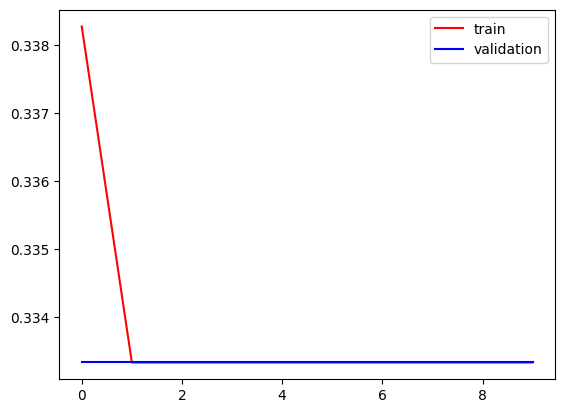

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

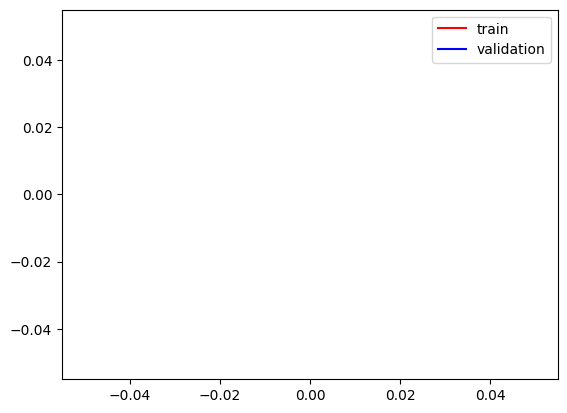

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

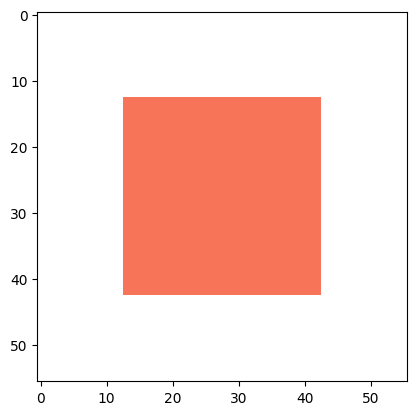

In [ ]:
test_img = cv2.imread('/content/img_dataset/test/Square/square_140.png')
plt.imshow(test_img)

In [ ]:
test_img.shape

(56, 56, 3)

In [ ]:
test_img = cv2.resize(test_img,(56,56))


In [ ]:
test_input = test_img.reshape((1,56,56,3))

In [ ]:
model1.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[nan]], dtype=float32)